In [115]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join

data_relative_path = "./../data/raw/ml-100k/u.data"
moives_relative_path = "./../data/raw/ml-100k/u.item"
user_relative_path = "./../data/raw/ml-100k/u.user"

In [93]:
column_names = ['user', 'movie', 'rating', 'time'] 
df = pd.read_csv(data_relative_path, sep = '\t', header = None, names = column_names)

In [94]:
df

,user,movie,rating,time
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


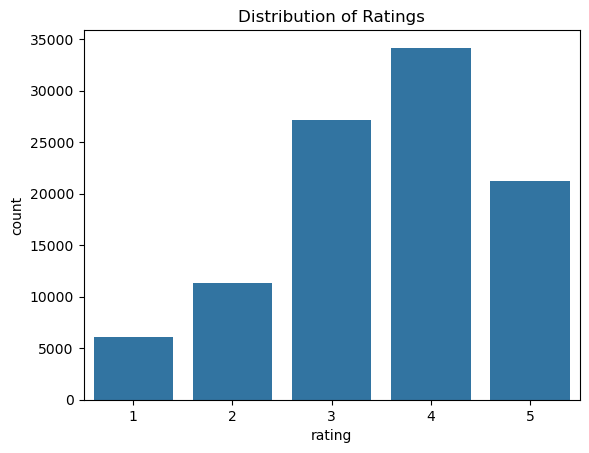

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

### The dataset appears to be fairly balanced.

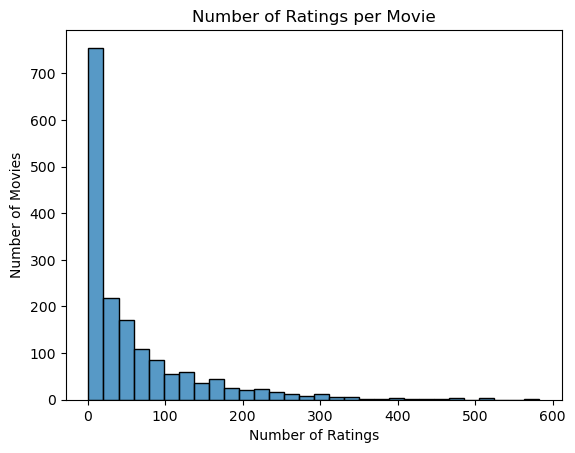

In [96]:
ratings_per_movie = df.groupby('movie').size()
sns.histplot(ratings_per_movie, bins=30)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

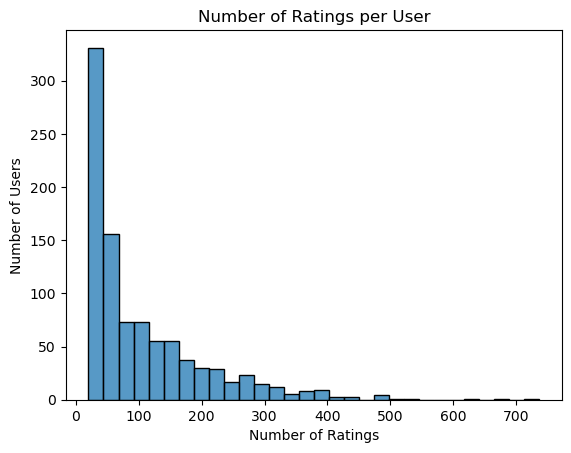

In [97]:
ratings_per_user = df.groupby('user').size()
sns.histplot(ratings_per_user, bins=30)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

### It is evident that both the number of ratings per user and the number of ratings per movie follow a logarithmic distribution.

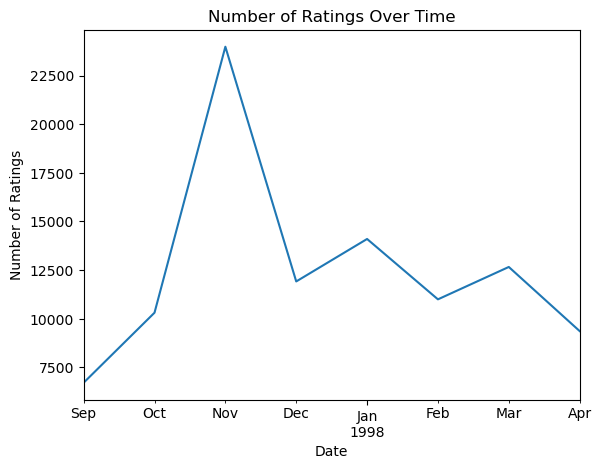

In [98]:
from datetime import datetime
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df['count'] = 1
df.resample('M')['count'].sum().plot()
plt.title('Number of Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Ratings')
plt.show()

In [100]:
avg_ratings = df.groupby('movie')['rating'].mean()
top_rated = avg_ratings.sort_values(ascending=False).head(15)
print(top_rated)

movie
814     5.000
1599    5.000
1201    5.000
1122    5.000
1653    5.000
1293    5.000
1500    5.000
1189    5.000
1536    5.000
1467    5.000
1449    4.625
119     4.500
1398    4.500
1642    4.500
1594    4.500
Name: rating, dtype: float64


In [101]:
movies_columns_names = ["id",
                        "name",
                        "date",
                        "empty",
                        "url",
                        "unknown",
                        "Action",
                        "Adventure",
                        "Animation",
                        "Children's",
                        "Comedy",
                        "Crime",
                        "Documentary",
                        "Drama",
                        "Fantasy",
                        "Film-Noir",
                        "Horror",
                        "Musical",
                        "Mystery",
                        "Romance",
                        "Sci-Fi",
                        "Thriller",
                        "War",
                        "Western"]
movies_df = pd.read_csv(moives_relative_path, sep = '|', header = None, encoding='ISO-8859-1', names = movies_columns_names)

In [102]:
movies_df

,id,name,date,empty,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# Basic Info
print(movies_df.info())
print(movies_df.describe())

genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
for genre in genre_cols:
    print(f"{genre}: {movies_df[genre].sum()}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1682 non-null   int64  
 1   name         1682 non-null   object 
 2   date         1681 non-null   object 
 3   empty        0 non-null      float64
 4   url          1679 non-null   object 
 5   unknown      1682 non-null   int64  
 6   Action       1682 non-null   int64  
 7   Adventure    1682 non-null   int64  
 8   Animation    1682 non-null   int64  
 9   Children's   1682 non-null   int64  
 10  Comedy       1682 non-null   int64  
 11  Crime        1682 non-null   int64  
 12  Documentary  1682 non-null   int64  
 13  Drama        1682 non-null   int64  
 14  Fantasy      1682 non-null   int64  
 15  Film-Noir    1682 non-null   int64  
 16  Horror       1682 non-null   int64  
 17  Musical      1682 non-null   int64  
 18  Mystery      1682 non-null   int64  
 19  Romanc

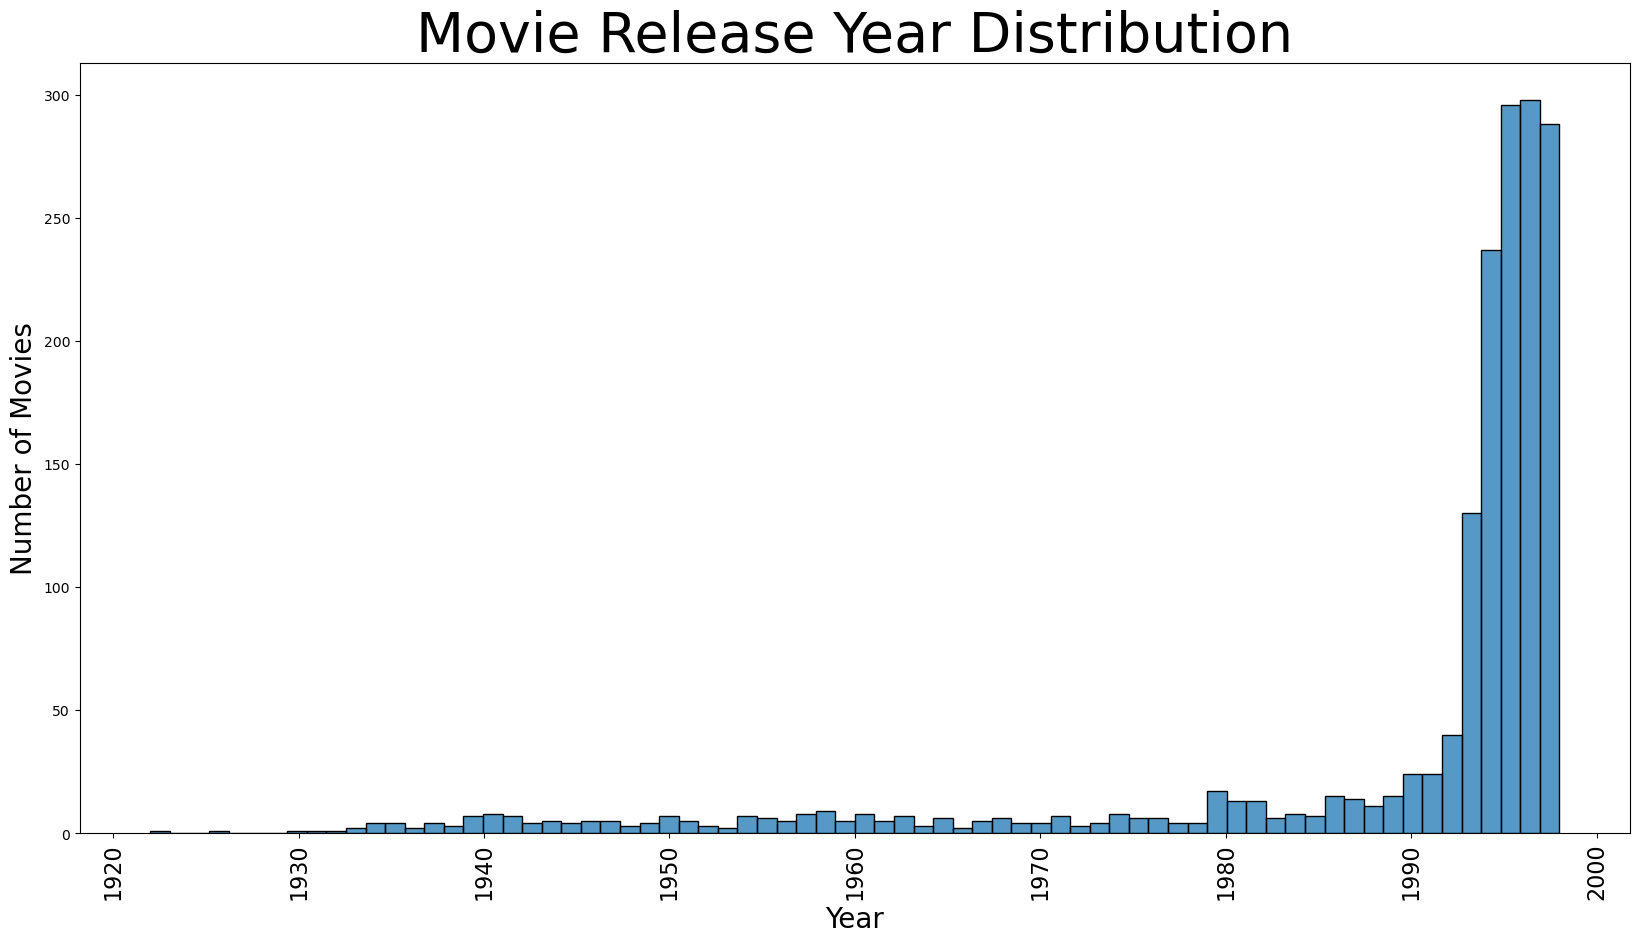

Movies with URL: 1679


In [112]:
# Release Year Analysis
movies_df['year'] = movies_df['name'].str.extract(r'\((\d{4})\)')
plt.figure(figsize=(20, 10))
sns.histplot(movies_df['year'].dropna().astype(int), bins=len(movies_df['year'].unique()))
plt.xticks(rotation=90, fontsize=16) 
plt.title('Movie Release Year Distribution', fontsize=40)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Movies', fontsize=20)
plt.show()

# URL Analysis
print(f"Movies with URL: {movies_df['url'].notnull().sum()}")

In [113]:
combined_df = pd.merge(df, movies_df, left_on='movie', right_on='id')

# Calculate average ratings
avg_ratings = combined_df.groupby('name')['rating'].mean()

# Get top 10 rated movies
top_rated = avg_ratings.sort_values(ascending=False).head(15)
print(top_rated)

name
They Made Me a Criminal (1939)                       5.000
Marlene Dietrich: Shadow and Light (1996)            5.000
Saint of Fort Washington, The (1993)                 5.000
Someone Else's America (1995)                        5.000
Star Kid (1997)                                      5.000
Great Day in Harlem, A (1994)                        5.000
Aiqing wansui (1994)                                 5.000
Santa with Muscles (1996)                            5.000
Prefontaine (1997)                                   5.000
Entertaining Angels: The Dorothy Day Story (1996)    5.000
Pather Panchali (1955)                               4.625
Some Mother's Son (1996)                             4.500
Maya Lin: A Strong Clear Vision (1994)               4.500
Anna (1996)                                          4.500
Everest (1998)                                       4.500
Name: rating, dtype: float64


In [120]:
users_columns_names = ["id", "age", "gender", "occupation", "zip code"]
users_df = pd.read_csv(user_relative_path, sep = "|", header = None, names = users_columns_names)

In [137]:
users_df.describe()

,id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


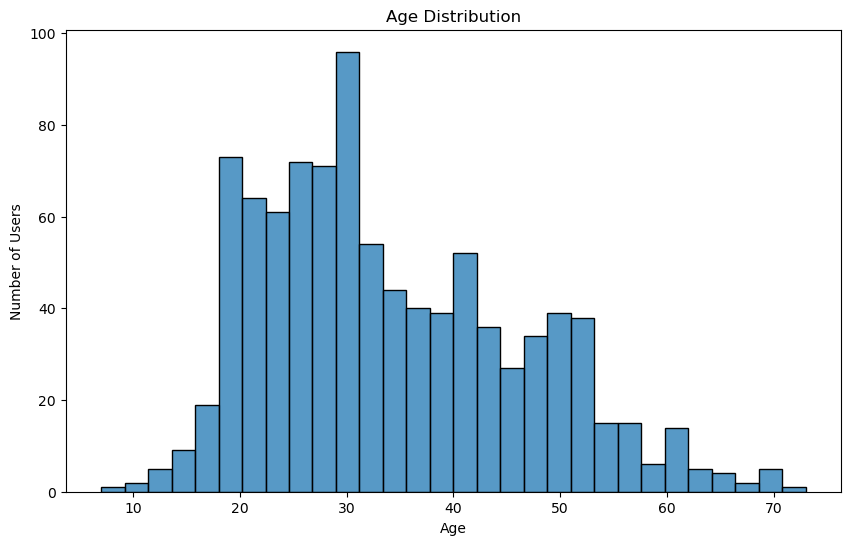

In [123]:
# Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(users_df['age'], bins=30, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

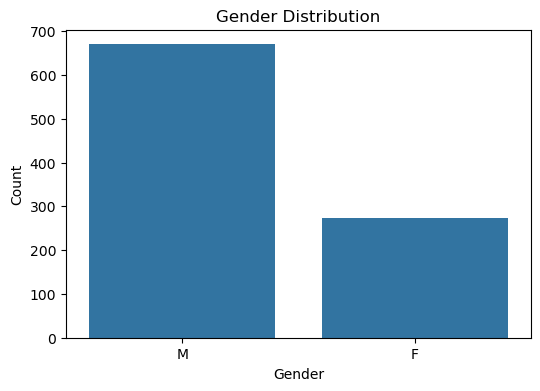

In [124]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=users_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

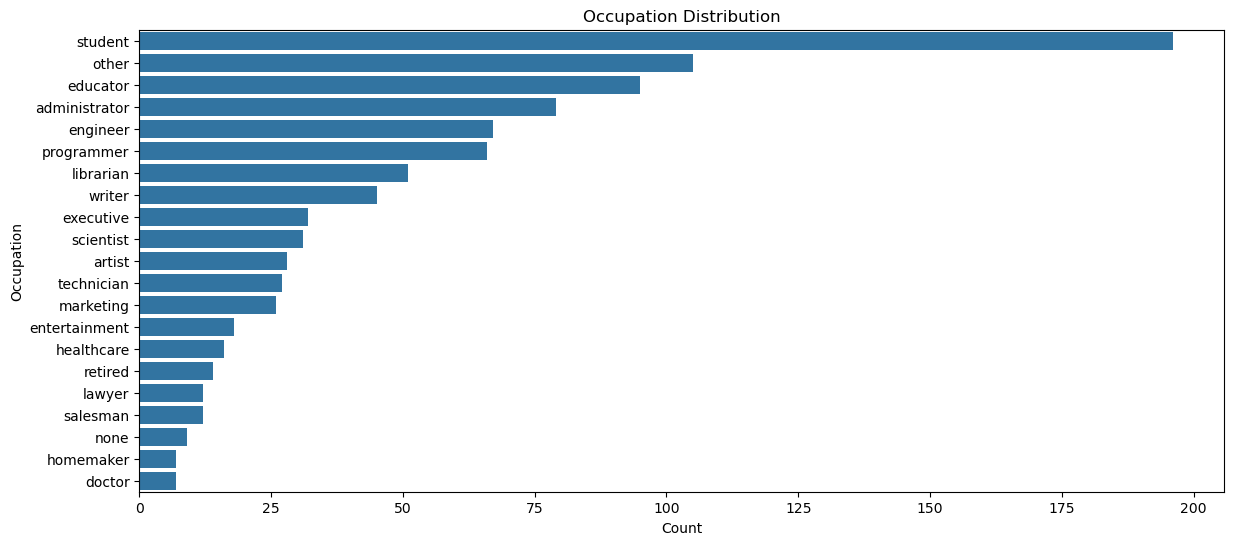

In [125]:
plt.figure(figsize=(14, 6))
sns.countplot(y='occupation', data=users_df, order = users_df['occupation'].value_counts().index)
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

In [126]:
merged_df = pd.merge(df, users_df, left_on='user', right_on='id')

final_merged_df = pd.merge(merged_df, movies_df, left_on='movie', right_on='id')


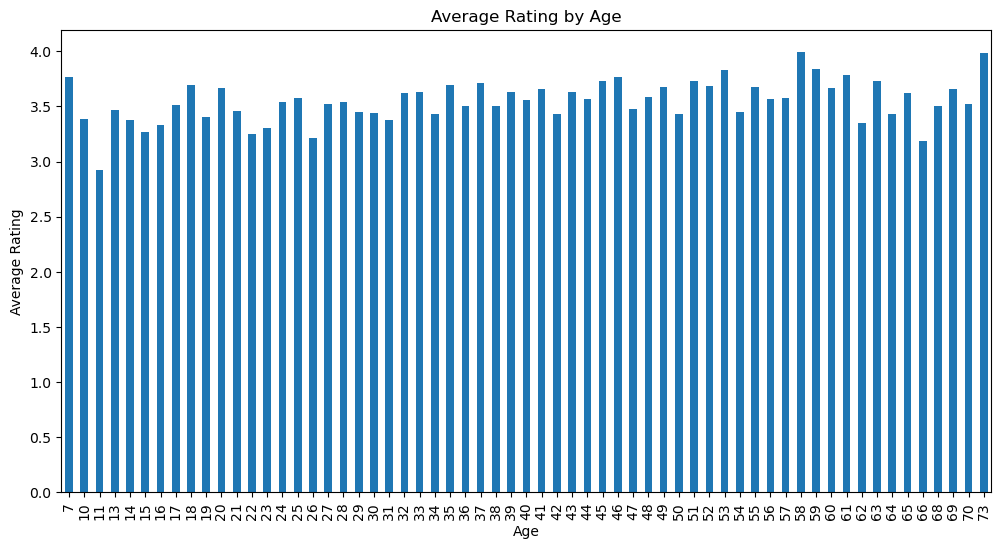

In [128]:
age_rating = final_merged_df.groupby('age')['rating'].mean()
plt.figure(figsize=(12, 6))
age_rating.plot(kind='bar')
plt.title('Average Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.show()

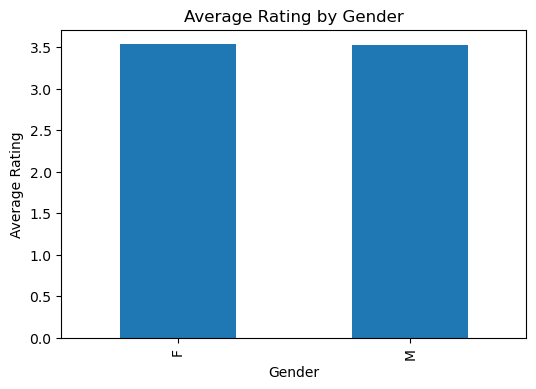

In [129]:
gender_rating = final_merged_df.groupby('gender')['rating'].mean()
plt.figure(figsize=(6, 4))
gender_rating.plot(kind='bar')
plt.title('Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()


In [135]:
genre_by_gender = final_merged_df.groupby('gender')[genre_cols].mean()

# Define a function to find the top 5 genres for each gender
def top_5_genres(row):
    return row.sort_values(ascending=False).head(5).index.tolist()

# Apply the function to each row (gender) in the DataFrame
top_5_by_gender = genre_by_gender.apply(top_5_genres, axis=1)

print(top_5_by_gender)

gender
F    [Drama, Comedy, Romance, Action, Thriller]
M    [Drama, Comedy, Action, Thriller, Romance]
dtype: object


In [136]:
occupation_movie_count = final_merged_df.groupby(['occupation', 'name'])['rating'].count().reset_index(name='count')

# Find the most popular movie for each occupation
most_popular_movies_by_occupation = occupation_movie_count.loc[occupation_movie_count.groupby('occupation')['count'].idxmax()]

# Since we are interested in the movie names, make sure 'name' is included in the groupby method
print(most_popular_movies_by_occupation[['occupation', 'name', 'count']])


          occupation                         name  count
318    administrator  English Patient, The (1996)     47
1789          artist             Star Wars (1977)     18
1925          doctor         Air Force One (1997)      5
2675        educator  English Patient, The (1996)     61
4427        engineer             Star Wars (1977)     50
4733   entertainment           Chasing Amy (1997)     13
5613       executive               Contact (1997)     22
6444      healthcare         Air Force One (1997)     11
7686       homemaker         Air Force One (1997)      6
8069          lawyer  English Patient, The (1996)      9
8862       librarian  English Patient, The (1996)     35
9744       marketing               Contact (1997)     18
10401           none               Contact (1997)      7
11844          other             Star Wars (1977)     62
13001     programmer             Star Wars (1977)     50
13390        retired                 Fargo (1996)     10
14187       salesman           